In [1]:
import ROOT
import my_library.constants as constants
import my_library.common_analysis_tools as ct
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
run_period = 'spring'
data_type = 'data'

In [3]:
df_pipkmks = ct.get_dataframe('pipkmks', run_period, data_type)
df_pimkpks = ct.get_dataframe('pimkpks', run_period, data_type)

In [4]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Filter('pipkmks_m > 1.1 && pipkmks_m < 1.35')
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Filter('pimkpks_m > 1.1 && pimkpks_m < 1.35')

In [5]:
df_pipkmks = df_pipkmks.Define('ppip2_px', 'p_px + pip2_px').Define('ppip2_py', 'p_py + pip2_py').Define('ppip2_pz', 'p_pz + pip2_pz') \
                       .Define('ppip2_E', 'p_E + pip2_E').Define('ppip2_m', 'sqrt(ppip2_E*ppip2_E - ppip2_px*ppip2_px - ppip2_py*ppip2_py - ppip2_pz*ppip2_pz)') \
                       .Define('ppim_px', 'p_px + pim_px').Define('ppim_py', 'p_py + pim_py').Define('ppim_pz', 'p_pz + pim_pz') \
                       .Define('ppim_E', 'p_E + pim_E').Define('ppim_m', 'sqrt(ppim_E*ppim_E - ppim_px*ppim_px - ppim_py*ppim_py - ppim_pz*ppim_pz)')

df_pimkpks = df_pimkpks.Define('ppim2_px', 'p_px + pim2_px').Define('ppim2_py', 'p_py + pim2_py').Define('ppim2_pz', 'p_pz + pim2_pz') \
                        .Define('ppim2_E', 'p_E + pim2_E').Define('ppim2_m', 'sqrt(ppim2_E*ppim2_E - ppim2_px*ppim2_px - ppim2_py*ppim2_py - ppim2_pz*ppim2_pz)') 
                        # .Define('ppip_px', 'p_px + pip_px').Define('ppip_py', 'p_py + pip_py').Define('ppip_pz', 'p_pz + pip_pz') \
                        # .Define('ppip_E', 'p_E + pip_E').Define('ppip_m', 'sqrt(ppip_E*ppip_E - ppip_px*ppip_px - ppip_py*ppip_py - ppip_pz*ppip_pz)')
                       


In [6]:
hist_ppip2_m = df_pipkmks.Histo1D(('hist_ppip2_m', 'M(p#pi^{+}_{K_{s}}) for #pi^{+}K^{-}K_{s}', 50, 1.0, 3.0), 'ppip2_m')
hist_ppim_m = df_pipkmks.Histo1D(('hist_ppim_m', 'M(p#pi^{-}_{K_{s}}) for #pi^{+}K^{-}K_{s}', 50, 1.0, 3.0), 'ppim_m')
hist_ppim2 = df_pimkpks.Histo1D(('hist_ppim2_m', 'M(p#pi^{-}_{K_{s}}) for #pi^{-}K^{+}K_{s}', 50, 1.0, 3.0), 'ppim2_m')
hist_ppip = df_pimkpks.Histo1D(('hist_ppip_m', 'M(p#pi^{+}_{K_{s}}) for #pi^{-}K^{+}K_{s}', 50, 1.0, 3.0), 'ppip_m')

In [7]:
c1 = ROOT.TCanvas('c1', 'c1', 1200, 1000)
c1.Divide(2,2)

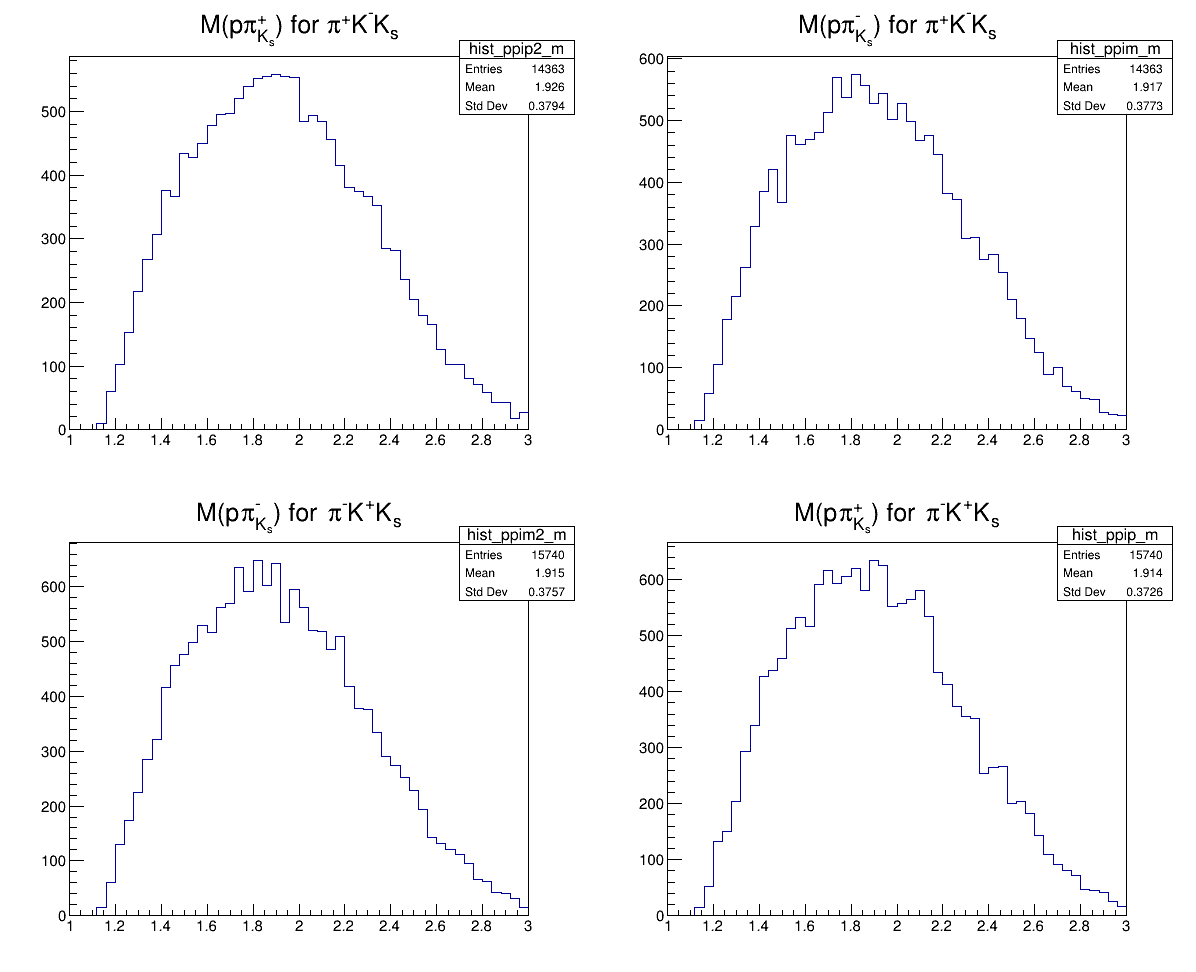

In [8]:
c1.cd(1)
hist_ppip2_m.Draw()
c1.cd(2)
hist_ppim_m.Draw()
c1.cd(3)
hist_ppim2.Draw()
c1.cd(4)
hist_ppip.Draw()
c1.Draw()

In [9]:
hist_ppip2_2d_m = df_pipkmks.Histo2D(('hist_ppip2_m', 'M(p#pi^{+}_{K_{s}}) for #pi^{+}K^{-}K_{s}', 20, 1.2, 1.35, 50, 1.0, 3.0), "pipkmks_m",  'ppip2_m')
hist_ppim_2d_m = df_pipkmks.Histo2D(('hist_ppim_m', 'M(p#pi^{-}_{K_{s}}) for #pi^{+}K^{-}K_{s}', 20, 1.2, 1.35, 50, 1.0, 3.0), "pipkmks_m",  'ppim_m')
hist_ppim2_2d_m = df_pimkpks.Histo2D(('hist_ppim2_m', 'M(p#pi^{-}_{K_{s}}) for #pi^{-}K^{+}K_{s}', 20, 1.2, 1.35, 50, 1.0, 3.0), "pimkpks_m",  'ppim2_m')
hist_ppip_2d_m = df_pimkpks.Histo2D(('hist_ppip_m', 'M(p#pi^{+}_{K_{s}}) for #pi^{-}K^{+}K_{s}', 20, 1.2, 1.35, 50, 1.0, 3.0), "pimkpks_m",  'ppip_m')

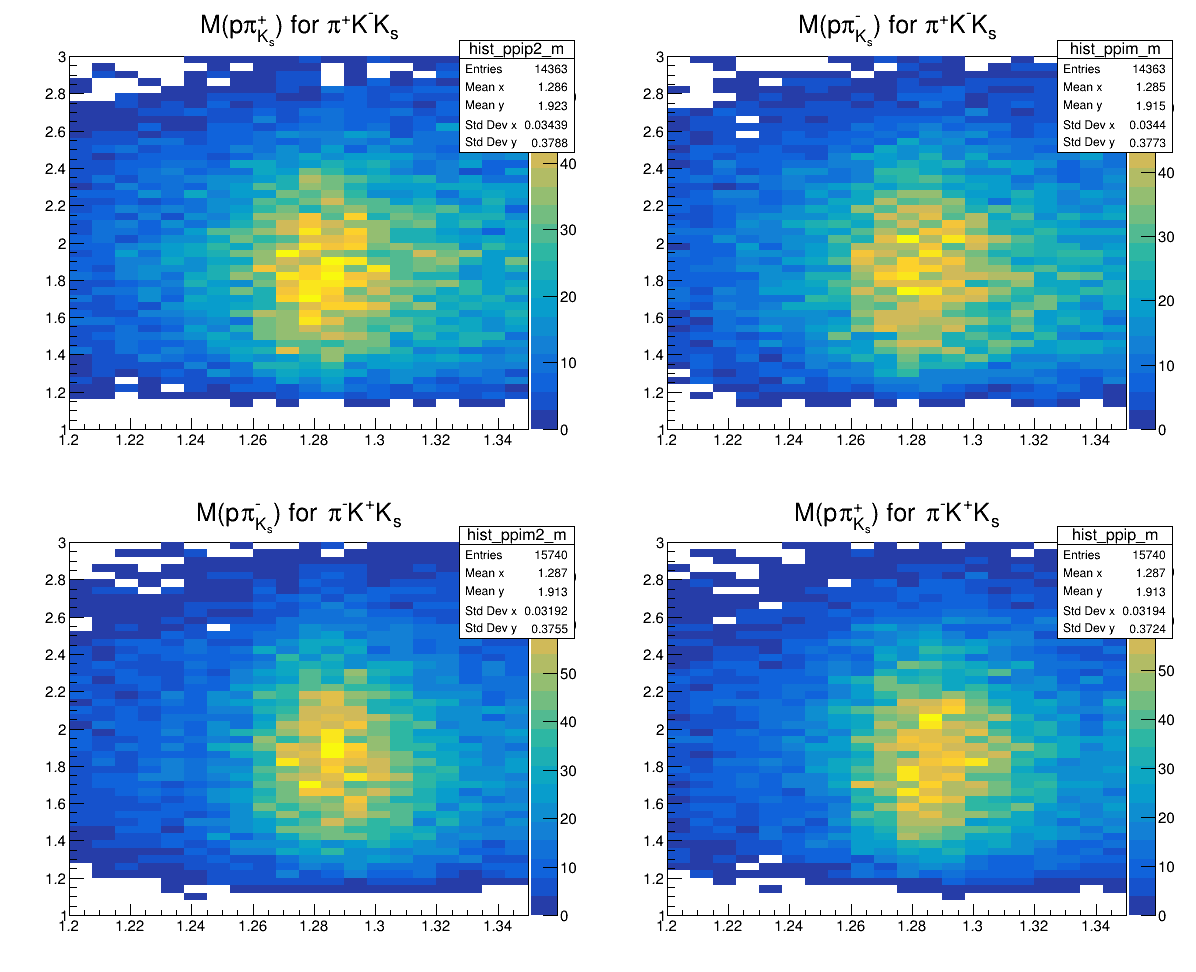

In [10]:
c1.cd(1)
hist_ppip2_2d_m.Draw('colz')
c1.cd(2)
hist_ppim_2d_m.Draw('colz')
c1.cd(3)
hist_ppim2_2d_m.Draw('colz')
c1.cd(4)
hist_ppip_2d_m.Draw('colz')
c1.Draw()
